# Statistics for Astronomical Applications

### Abstract

We conduct experiments to explore the basic  statistical theory underlying astronomical research and study, focusing primarily on the Binomial and Poisson probability distribution functions. We first created an empircal approach to predict  binomial probabilities of the number of successes $x$ in a certain number of draws $N$ of a random variable (which can only have two outcomes), by means of a frequentist technique. Using this binomial approximate function, we calculate the expected value of the number of "successes" for a certain number of "trials". We then empircally observe the model of the binomial pdf when assuming a small $p$ and large $N$, and compare the resulting model to the theoretical poisson distribution. We find that they closely match, as expected from statistical theory. We then compute the expected value and variance of the poisson pdf. By conducting such exercises with the binomial and poisson pdf, we can observe the accuracy of functions which numerically estimate the binomial probablities by means of frequentist techniques, with a given number of "samples" or "loops". Also, we can observe the significance of $N$ has on the binomial distribution, particulary the expected value, and the poisson approximation when $N$ is large and $p$ is correspondingly small. We conclude that for binomial distributions, the mean has a simple linear relationship with $N$, and that for large $N$ and a correspondingly low $p$, the binomial distribution approximates the poisson distribution. For poisson distributions, we observe that the mean and variance have a unity relationship with each other. When increasing $p$, or more accurately, the $\lambda$ parameter in a poisson pdf, both the mean and variance of the distribution will increase.

### Introduction

In the context of experimental science, the growth of scientific knowledge rests upon the fundamental theories and tools of statistics and proabability. Particularly in modern astronomy and astrophysics research, statistics is vital. Perhaps most obvious is the use of statistics to detect signals - whether whatever we measure is a statistically significant measurement from some background "noise" for instance. Or instead, the determination of a correlation between two quantities, such as when measuring the correlation between a galaxy's nuclear luminosity and it's stellar mass. 
   
The theory of probability calulus can be used to derive mathematical expressions for the probabilities in some sample or distribution. At a fundamental level, these expressions, known as probability distribution functions (pdf), can be considered in either disrete or continuous cases. With a discrete pdf, the distribution of some random variable occurs only at specified values, most commonly as integers. Two well known cases that are discrete are the Binomial and Poisson pdfs. In astronomy, these two probability distributions play an important role. For example, when computing perhaps an AGN fraction of some sample of galaxies, we can model this distribution as being binomial, since a galaxy is either active or not. We can estimate the proability of a galaxy being active given a survey, as well as derive errors on this estimate. For poisson pdfs, we can of course model the arrival of photons at a ccd, which is important in estimating the mean bkg rate, important for determining a signficant detection.

While the exact mathematical expressions for the binomial and poisson distribution functions can be derived, a numerical estimation can be achieved through the use of frequentist statistics, in which a large number of samples of a distribution are computed, and the desired value, proability in this case, computed numerically over the entire sample. We can compute the probability at any value of $x$ by using loops in python.

Through the running of experiments to empircally derive the binomial and poisson proability results, we observe the fundamental theory behind these pdfs. By building these distributions from scratch, the application of the theory can be seen more clearly. By experimenting with these two distributions, we can also observe the effects of different paramters, such as the effects of varying $N$ and $x$.

### Theory

The Binomial proabability distribution function allows the calculation of the probability of a certain number of sucessess, $x$, arising after a given number of independent trials, $N$. It is appropriate in the application to distributions in which a random proccess allows only two outcomes. We can motivate the theoretical mathematical expression for this function by first considering a simplified case. Consider some distribution of objects with a probability $p$ for having some state (which we can call a "success"), and thus a probability of $q = (1-p)$ of not having this state. Let us then sample this distribution two times, meaning we draw two objects from this distribution. Assuming the objects to be coins, then we can either have outcomes of $hh$, $ht$, $th$, or $tt$. We can write the probabilites of these outcomes as 
$$
\begin{align*} 
P(hh) &= P(h)^2 \\
P(ht + th) &= 2P(h)P(t) \\
P(tt) &= P(t)^2
\end{align*}
$$

Note that these probabilites are the elements of binomial expansion of: $(P(h)+P(t))^2 = (p + q)^2$, with the coefficents representing the number of "combinations" of a certain number of heads. Consider then the case of sampling $N$ objects, rather than just 2. The number of combinations containing $x$ "successes" would simply be the $x^{th}$ coefficient of the expansion of $(p + q)^N$, with the probability of each combination being $p^nq^{N-n}$. Thus the probability of $x$ successes after $N$ samples is simply the binomial expansion. We can also simply consider the probability of the combination through the use of the combination function ${{N}\choose{x}}$, which tells us the number of ways to "choose" $x$ from $N$, in which ordering is irrelevant. Thus, the binomial probability distribution function is: 

$$
P_{binomial}(N,x) = {{N}\choose{x}} \cdot p^nq^{N-n} = \frac{N!}{(N-x)!\cdot x!} \cdot p^nq^{N-n}
$$

The mean $\langle x \rangle$ and variance $\sigma ^2$ of the binomial distribution are given here without proof: 

$$
\langle x \rangle _{binomial}= Np \\
\sigma ^2 _{binomial}= Np(1-p)
$$

The Poisson distribution essentially models the distribution of some number of random events which are independent from each other, and for which the rate is constant. The expression for the Poisson distribution can be derived from the binomial distribution function, assuming a small proability $p$, and a large number of samples $N$. Given the binomial form $\frac{N!}{(N-x)!\cdot x!} \cdot p^nq^{N-n}$, and assuming $p<<1$, and $N$ is large such that $(N-x) \approx N$ , we first rewrite the expression in terms of $\lambda = N \cdot p$:

$$
P_{binomial}(N,x) = \frac{N!}{(N-x)!\cdot x!} \cdot \left(\frac{\lambda}{N}\right)^n \cdot \left(1 - \frac{\lambda}{N}\right)^{N-n}
$$

We then rewrite the first two terms in the expression by taking natual logs, and make use of $\textbf{Stirling's apprximation}$, where $\ln n! \approx n \ln n - n$:

$$
\begin{align*}
\ln\left(\frac{N!}{(N-x)!\cdot x!}\right) &= \ln N! - \ln (N-x)! - \ln x! \\
&\approx [N \ln N - N] - [(N-x) \ln (N-x) - (N - x)] - \ln x! \\
&= N \ln N - N \ln (N-x) - N + x \ln (N-x) + (N- x) - \ln x! \\
&\approx N \left[\ln\left(\frac{N}{N}\right) - 1\right] + x \left[\ln(N)\right] + (N)- \ln x! \\
&= -N  + \ln(N)^x + N - \ln x! \\
&= \ln(N)^x - \ln x!\\
\ln\left(1-\frac{\lambda}{N}\right)^{N-x} &= (N-x) \ln \left(1 - \frac{\lambda}{N}\right) \\
&= N \ln \left(1 - \frac{\lambda}{N}\right) \\
&\approx N \cdot \left(- \frac{\lambda}{N}\right) \\
&= - \lambda
\end{align*}
$$

Taking the eponents of these results to revert back to the original expression, we have:

$$
\begin{align*}
\frac{N!}{(N-x)!\cdot x!} &= e^{(\ln(N)^x - \ln x!)} = \frac{N^x}{x!} \\
\left(1-\frac{\lambda}{N}\right)^{N-x} &= e^{- \lambda}
\end{align*}
$$

Plugging these values back into the binomial distribution function, we now have:

$$
\begin{align*}
P_{binomial}(N,x) &= \frac{N!}{(N-x)!\cdot x!} \cdot \left(\frac{\lambda}{N}\right)^n \cdot \left(1 - \frac{\lambda}{N}\right)^{N-n} \\
&\approx \frac{\lambda ^ x}{x!} \cdot e^{-\lambda} \\
&= \frac{\lambda ^x e^{-\lambda}}{x!}
\end{align*}
$$

This is the mathematical expression for the Poisson pdf, which we can now formally define as:

$$ 
P_{poisson}(x) = \frac{\lambda ^x e^{-\lambda}}{x!}
$$

The mean and variance of the poisson distribution are:

$$
\langle x \rangle _{poisson}= 
\sigma ^2 _{poisson}= \lambda
$$

An important quantity related the probability distributions is the variance, which measures the spread of a distribution about it's mean. The variance is related to the moment of a distribution, $m_n$, defined explicitly as:

$$
m_n \equiv \langle x^n \rangle = \int_{-\infty}^{\infty}x^n  p(x) dx
$$

This is the general form for the moment of a distribution, and is correct for continuous distributions. For discrete cases, such as the binomial and poisson pdf, although taking an interal is equivalent, we can also write a unique summation for the moment which are not appropriate for continuous distributions: 
$$
m_{n.discrete} = \sum_{x=0}^{\infty}{x^n p(x)}
$$

The first moment, $m_1 = \langle x \rangle$, is the expectation value of x, or the mean of the distribution. 
The variance of a distribution can be represented by what is known as a centered moment, which is obtained by shifting the origin of x to the mean:
$
\mu_n \equiv \langle (x - \langle x \rangle)^2 \rangle.
$
The seecond centered moment measures the variance. We can derive a useful computational form for the variance from this expression:

$$
\begin{align*}
\sigma ^ 2  \equiv \mu_2 &= \langle (x - \langle x \rangle)^2 \rangle \\
&= \langle x^2 - 2 x \langle x \rangle + \langle x \rangle ^2 \rangle \\
&= \langle x^2 \rangle - 2 \langle x \rangle \langle x \rangle + \langle x \rangle ^2 \\
&= \langle x^2 \rangle - 2 \langle x \rangle ^2 + \langle x \rangle ^2 \\
&= \langle x ^2 \rangle - \langle x \rangle ^2
\end{align*}
$$

This form of variance, where $ \sigma ^2 = \langle x ^2 \rangle - \langle x \rangle ^2$ , can be used to easily compute the variance computationally for a given distribution just given x.

### Experiment and Methodology

We imported here the needed packages used in this experiment

In [145]:
import numpy as np
from scipy.misc import factorial
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

The number of trials $N$, and number of successes $x$ were set as integer variables to be input manually when the code is run.

Here, we defined a function which numerically estimates the binomial probability given some $N$ and $x$ for a success probability of $p = 0.5$. This is accomplished by drawing a distribution array of two integers, ($0$ and $1$ in this case), whose size is dependant on the number of trials we wish to test. The integers represent either a success or failure. We defined a variable, $success$, to be the number of its respective integer in the distribution array. 

We then looped over this action $1e4$ times, where after each loop, a single count was added to the corresponding index of a pre-created zero array with $N+1$ elements, in order to account for zero successes. In this zero array, the $0th$ index corresponds to zero successes, the $1st$ index corresponds to 1 success, etc. After the loop completes, we can then easily return the probabilty of some number of successes in some number of trials by dividing the number of successes counted by the number of loops.

The amount of loops was determined rather arbitrarily. The more loops, the more accurate the estimation - for purposes of this experiment, $1e4$ was determined to be adequete to provide acceptable accuracy without uneccesarry processing time.

In [207]:
N = int(input("Please enter the number of trials: "))           # Allow the number of trials and successes to be input
x = int(input("Please enter number of binomial successes: "))

def prob_b(trials,s):
    counts = np.zeros(trials+1)  # create a "count" array to hold the number of counts for each number of successes ina certain experiment, corresponding to the index of the array
    r = 10000 
    for i in range(r):
        draw = np.random.randint(2, size = trials)
        success = len(draw[np.where(draw == 1)])   
        counts[success] = counts[success] + 1
    prob = (counts[s])/r    
    return prob

print("The probability of {} successes in {} trials is: {}".format(x,N,prob_b(N,x)))

Please enter the number of trials: 5
Please enter number of binomial successes: 2
The probability of 2 successes in 5 trials is: 0.3091


We then plotted the approximate binomial distribution function defined above as a histogram, for the probability of $x$ successes in $20$ trials.

Here we define the variables used to plot the histogram. $x$ was created as an array from $0$-$20$, and y was created to be an array with $20$ elements, with the $ith$ element corresponding to the probability of $i$ successes.

We also defined a function for the precise definition of a binomial distribtution for a probability of $p = 0.5$. Within the defined function, an x-array is created with $N+1$ elements, and thus the output of the function is an array for the probability values. We fill alternative arrays x_fit and y_fit for this function.

In [208]:
x = np.arange(0,21)
y = np.zeros(21)

for i in range(21):
    y[i] = y[i] + prob_b(20,i)  # array of the y values for the plot, simply the proabability at each x in the range
    
def PNx(N):  # define theoretical binomial proabability function for p = 0.5
    p = 0.5
    x_f = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x_f)*factorial(N-x_f)))*((0.5)**N)
    return PNx

x_fit = np.arange(0,21)
y_fit = PNx(20)

We then simply plot the x and y values defined above to plot a histogram and line overplot.

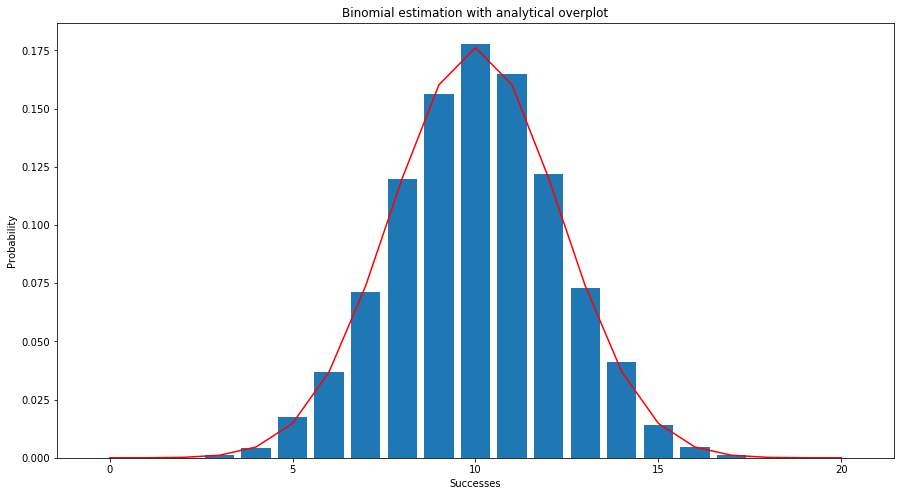

In [209]:
rcParams['figure.figsize'] = (15.0, 8.0)  # resize plot

plt.bar(x,y)   # histogram
plt.plot(x_fit,y_fit, color='r') #line overplot
plt.title("Binomial estimation with analytical overplot")
plt.xlabel("Successes")
plt.ylabel("Probability")
plt.show()

The Figure above is the histogram of successes and their respective probabilities, as given by numerical approximate binomial function. Overplotted in red is the theoretical prediction for the binomial distribution. Note that in both the approximation and theory, the peak is at 10 successes. 

We now use the function prob_b we defined above to estimate the expected value of two different distributions. 

Here we created simple loops to summate the functions over an array of x values, for both 20 trials and 40 trials. We employed the expression for the expected value of a discrete variable, defined in the theory section as the first moment. The computations and comparisons to the mean of the theoretical binomial distribution are shown below.

In [210]:
# For N = 20 trials 

trial = 20
p = 0.5
expec_v_20 = 0
for i in range(1,21):
    expec_v_20 += i * prob_b(trial, i)  # Sum over entire x range the x times probability

print("Expected value of success for 20 trials is: ", expec_v_20)

mu_20 = trial * p
print("Theoretical mean of binomial distribution is : ", mu_20)
print("The expectation value differs from theoretical mean by: ", expec_v_20/mu_20)
print("~~~~")

# For N = 40 trials

trial = 40
expec_v_40 = 0
for i in range(1,41):
    expec_v_40 += i * prob_b(trial, i)

print("Expected value of success for 40 trials is: ", expec_v_40)

mu_40 = trial * p
print("Theoretical mean of binomial distribution is : ", mu_40)
print("The expectation value differs from theoretical mean by: ", expec_v_40/mu_40)

Expected value of success for 20 trials is:  9.9573
Theoretical mean of binomial distribution is :  10.0
The expectation value differs from theoretical mean by:  0.99573
~~~~
Expected value of success for 40 trials is:  20.1096
Theoretical mean of binomial distribution is :  20.0
The expectation value differs from theoretical mean by:  1.00548


We see that the calculated expected value is slightly different from the theoretical value in both cases - this is to be expected. Since the code uses the estimation function prob_b, rather than an exact analytical expression, the probabilities are only approxamite, and their accuracy limited by the number of runs we defined in the function. If the code above had used the exact analystical definition for the binomial distribtuion to cacluate the probabilites at each x, the answers would have been the same. 

This comparison allows us to observe the accuracy of the function that was defined to estimate the binomial distribution, at least with respect to the mean of the distribution. 

We then defined an altered version of the prob_b function, allowing a user to alter the input probability of success (assuming it to be low). In order to paramterize the probability in the same way as in the prob_b function, where the probability was inherent in the choice of 2 integers, we drew 1000 integers, rather than 2. The success variable was then defined as the length of the array of elements less than or equal to a normalized proability variable p_range, in which we simply multiplied the probability by 1000. The rest of the function follows the form of prob_b.

In [309]:
p = float(input("Please enter a small value for the probability: "))

def P(trials,s,p):
    counts = np.zeros(trials+1)
    r = 10000 
    p_range = np.floor(p * 1000)
    for i in range(r):
        draw = np.random.randint(1000, size = trials)
        success = len(draw[(np.where(draw <= p_range))])  # success defined as array with only elements below proabability range 
        counts[success] = counts[success] + 1
    prob = (counts[s])/r
    return prob

Please enter a small value for the probability: 0.02


Basic histogram parameters were created for this function P we defined, as well as for binomial, and the poisson distribution. The exact functions for the binomial and poisson proababilites were defined, using the exact form presented in the theory section. The parameters for the three distributions were created the same way as for the binomial histogram.

In [310]:
N = 100
x_range = np.arange(0,101)


# histogram parameters
y_range_P = np.zeros(101)
for i in range(101):
    y_range_P[i] = P(N,i,p)
    
    
# Binomial parameters
def P_b(trials, s, p):
    p = (factorial(trials)*(p**s)*((1-p)**(trials-s)))/(factorial(trials - s) * factorial(s))
    return p

y_range_Pb = np.zeros(101)
for i in range(101):
    y_range_Pb[i] = P_b(N,i,p)
    
    
#Poisson parameters    
def P_p(trials, s, p):
    lambd = trials * p
    p = (lambd ** s * np.exp(-lambd)) / factorial(s)
    return p

y_range_Pp = np.zeros(101)
for i in range(101):
    y_range_Pp[i] = P_p(N,i,p)

Here, we plot the parameters defined in the cel block above, creating three histograms on top of each other.

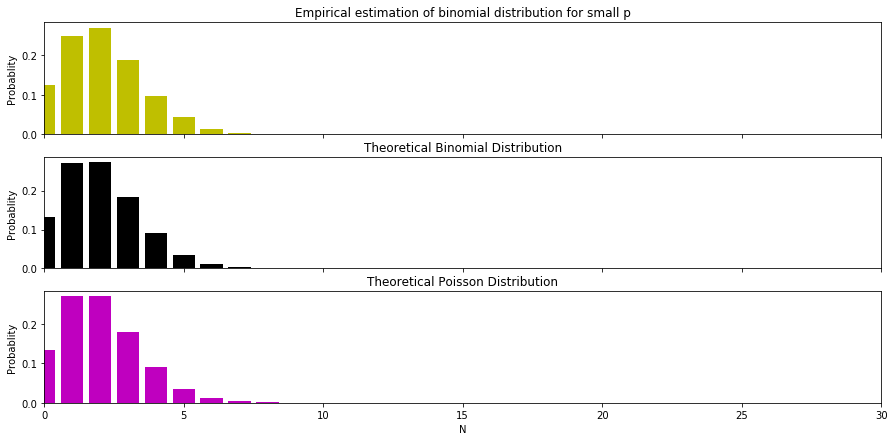

In [311]:
fig1 = plt.subplot(3,1,1)
plt.bar(x_range,y_range_P, color = 'y')
plt.xlim(0,30)
plt.ylabel("Probablity")
plt.title("Empirical estimation of binomial distribution for small p")
plt.setp(fig1.get_xticklabels(), visible=False)

fig2 = plt.subplot(3,1,2)
plt.bar(x_range,y_range_Pb, color='k')
plt.xlim(0,30)
plt.ylabel("Probablity")
plt.title("Theoretical Binomial Distribution")
plt.setp(fig2.get_xticklabels(), visible=False)

fig3 = plt.subplot(3,1,3)
plt.bar(x_range,y_range_Pp, color='m')
plt.xlim(0,30)
plt.xlabel("N")
plt.ylabel("Probablity")
plt.title("Theoretical Poisson Distribution")

rcParams['figure.figsize'] = (16.0, 10.0)
plt.show()

Above are the three plotted histograms. While observing the histograms of the binomial, poisson, and poisson estimation side by side is informational, we also plot below the binomial and poisson p distributions as line overplots to see directly the differences between the three.

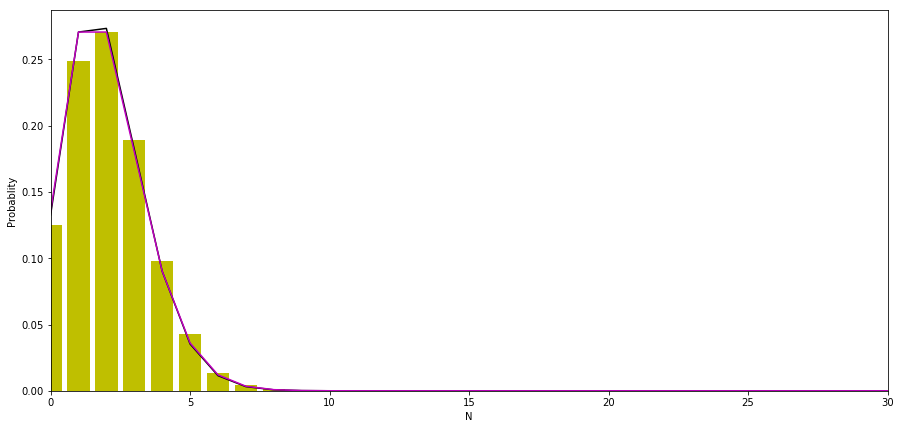

In [312]:
rcParams['figure.figsize'] = (15.0, 7.0)
plt.bar(x_range,y_range_P, color = 'y')
plt.xlim(0,30)
plt.ylabel("Probablity")
plt.xlabel("N")
plt.plot(x_range,y_range_Pb, color='k')
plt.plot(x_range,y_range_Pp, color='m')
plt.show()

Above is the histogram of our numerical estimation of the poisson distribution overplotted with the binomial and poisson theoretical functions. In the case of small $p$, in this case 0.02, and large $N = 100$, all three forms display nearly identical distributions. 

We then numerically calculated the expectation value of the P function (the poisson estimate function we defined), following the form derived in the theory section. We use the same method of finding the expectation value used for the binomial distribution. We calculate the expectiation value of $x^2$ and the square of $\langle x \rangle$, and subtract them. We then loop for a range of values for $p$, in order to create an array for the mean and variance to plot. We also compute this for both the approximate poisson function P, as well as the exact poisson function. 

In [336]:
r = np.linspace(0.001,0.1,5)
m = np.zeros(5)
mp = np.zeros(5)
v = np.zeros(5)
vp = np.zeros(5)
count = 0
for i in range(5): # loop for the values of lambda defined by r
    # Mean
    N = 100
    expec_v = 0
    expec_vp = 0
    for j in range(1,101):   
        expec_v += j * P(N,j,r[i])   # summation to compute expected value for both approx and exact pdf
        expec_vp += j * P_p(N,j,r[i])
    m[i] = expec_v    # fill arrays for mean, used later to plot
    mp[i] = expec_vp
    
    # Variance
    x2 = 0
    x2_p = 0
    for j in range(1,101):    
        x2 += j**2 * P(N,j,r[i])      # summation to find <x^2>
        x2_p += j**2 * P_p(N,j,r[i])
    x = expec_v ** 2    # define <x>^2
    x_p = expec_vp ** 2
    var = x2 - x  # define variance as the difference
    var_p = x2_p - x_p
    v[i] = var
    vp[i] = var_p   # fill arrays for variance

Here we plot the mean vs variance line for five points, for both the approximate and exact functions we defined for the poisson pdf. 

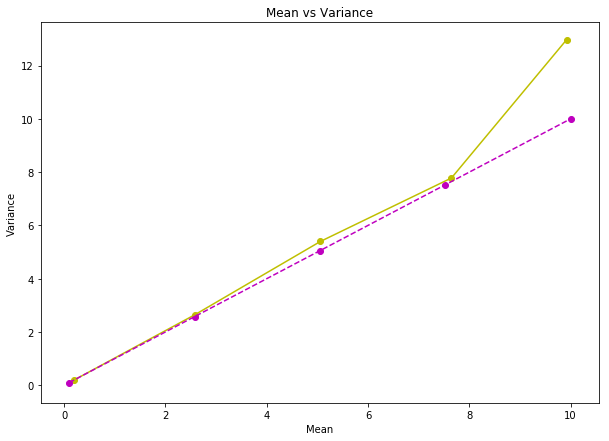

In [337]:
rcParams['figure.figsize'] = (10.0, 7.0)
plt.scatter(m,v,color='y')
plt.plot(m,v,color='y')
plt.scatter(mp,vp, color = 'm')
plt.plot(mp,vp, color = 'm', linestyle='--')
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.title("Mean vs Variance")
plt.show()

We see, in approximately both cases of plotting the exact poisson function and the approximate function P(N,i,p) which we defined, a linear unity relationship between the mean and variance. The deviation of the plot from the approximate function is simply the limitations of using frequentist statistics with a low number of trials. 

The linear relationship between mean and variance is expected - recall from theory section that the variance of the poisson distribution is equal to the mean. 

## Summary



The basic theory and applications behind the binomial and poissonion probability distribution functions were explored in detail. We first experimented with the binomial distribution, conducting experiments to numerically estimate binomial proabilities by defining a function which estimates that probabilites of $x$ successes for differing number of trials. We used a frequentist technique by looping the number of experiments many times to numerically estimate the probabilities at each value of $x$. We computed the expected value of $x$ for trials of $N = 20, 40$, which we then compared to the theoretical value for the binomial distribution, which is $Np$. 

We then used our approximate binomial function to estimate a poisson pdf by simply altering the proability within the original function to become very low. Using this function as a now approximate form for the pdf (assuming low p and large N), we computed the distribution for N = 100, by looping x through the range of 100. We then compared this result to the exact formulation of the binomial and poisson pdfs.

## Conclusions

For binomial probability distribution functions, the value of $N$ plays a significant role. The mean of a binomial distribution scales linearly with $N$. We found that for low $p$ and large $N$, the binomial distribution almost exactly matches the poisson distribution, which matches our expectations from deriving the poisson pdf from the binomial pdf for low $p$ and large $N$. For the poisson pdf, we also compute the expected value, as well as the variance. We found that the variance and mean of the poisson pdf have a unity relationship, which is theoretically expected, as the mean and variance are equivalent in the poisson pdf. Thus, for poisson pdfs, the larger the value of $\lambda = Np$, which is the average number of events we expect, the larger the variance of the distribution, and obviously the mean. Physically, this means that if we expect a large number of events, then the spread of possible values we measure could be very large. If instead we expect a very small number of events, the spread is correspondingly smaller. 